In [1]:
import numpy as np
import pandas as pd

<h3>1) Import and store the data in a data frame. (2.5 points)</h3>

<H4>Dataset Description : </H4>

Dataset:   airq402.dat

Source: U.S. Department of Transportation

Description: Airfsres and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

Variables/Columns

City1   1-3 
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-75

In [2]:
dataset_url="http://www.stat.ufl.edu/~winner/data/airq402.dat"

In [3]:
us_columns=['City_1','City_2','Average_Fare','Distance','Averg_weekly_passengers','markt_leading_airline','market_share','Avg_fare','Lowprice_airline','2_markt_share','price']

In [4]:
# importing the data and providing column names as per data description
data1=pd.read_csv(dataset_url,sep='\s+',names=us_columns) 

In [5]:
# another way if sep is not to be used for a url .dat file :
# data=pd.read_fwf("http://www.stat.ufl.edu/~winner/data/airq402.dat",names=us_columns)

In [6]:
us_air=pd.DataFrame(data=data1)

In [7]:
us_air

,City_1,City_2,Average_Fare,Distance,Averg_weekly_passengers,markt_leading_airline,market_share,Avg_fare,Lowprice_airline,2_markt_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


<h3>2)Remove the outliers from the data (5 points)</h3>

In [8]:
us_air.shape #original shape of the datset

(1000, 11)

In [9]:
#checking for missing values
us_air.isnull().any()

City_1                     False
City_2                     False
Average_Fare               False
Distance                   False
Averg_weekly_passengers    False
markt_leading_airline      False
market_share               False
Avg_fare                   False
Lowprice_airline           False
2_markt_share              False
price                      False
dtype: bool

In [10]:
#visualizing outliers
import seaborn as sns
sns.boxplot(us_air['Average_Fare'])

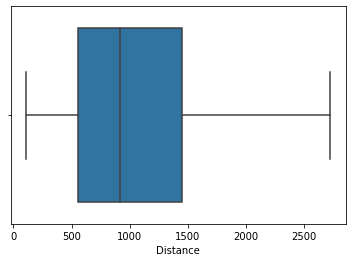

In [11]:
sns.boxplot(us_air['Distance'])

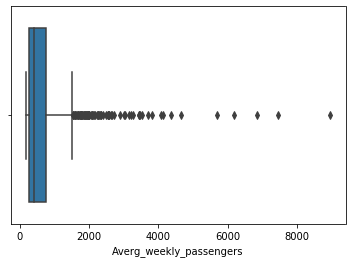

In [12]:
sns.boxplot(us_air['Averg_weekly_passengers'])

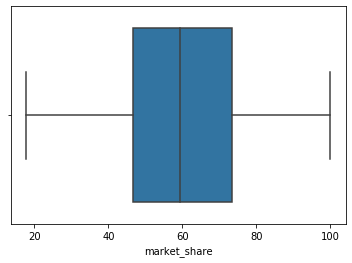

In [13]:
sns.boxplot(us_air['market_share'])

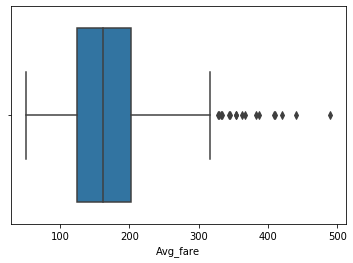

In [14]:
sns.boxplot(us_air['Avg_fare'])

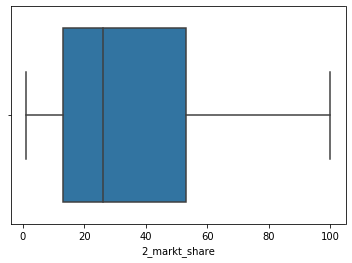

In [15]:
sns.boxplot(us_air['2_markt_share'])

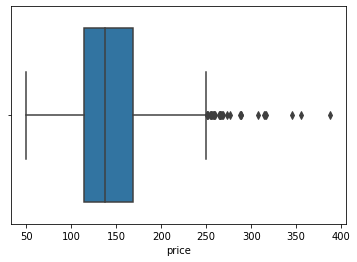

In [16]:
sns.boxplot(us_air['price'])

In [17]:
#Outliers presence and treatment usinh Inter Quartile Range method
q1 = us_air.quantile(0.25)
q3 = us_air.quantile(0.75)
iqr = q3 - q1
print(iqr)

Average_Fare                71.4175
Distance                   899.0000
Averg_weekly_passengers    512.7150
market_share                27.0000
Avg_fare                    78.8925
2_markt_share               39.7775
price                       54.7625
dtype: float64


In [18]:
lower_bound = q1 -(1.5 * iqr)

In [19]:
upper_bound = q3 +(1.5 * iqr)

In [20]:
print((us_air<lower_bound)|(us_air>upper_bound))
#The data point which have False means those values are valid whereas True indicates presence of an outlier.

     2_markt_share  Average_Fare  Averg_weekly_passengers  Avg_fare  City_1  \
0            False         False                    False     False   False   
1            False         False                    False     False   False   
2            False         False                    False     False   False   
3            False         False                    False     False   False   
4            False         False                    False     False   False   
5            False         False                    False     False   False   
6            False         False                    False     False   False   
7            False         False                    False     False   False   
8            False         False                    False     False   False   
9            False         False                    False     False   False   
10           False         False                    False     False   False   
11           False         False                    

In [21]:
#outlier treatment
f1=us_air[((us_air<lower_bound)|(us_air>upper_bound)).any(axis=1)]    

In [22]:
# The outliers present in the dataset are:
f1

,City_1,City_2,Average_Fare,Distance,Averg_weekly_passengers,markt_leading_airline,market_share,Avg_fare,Lowprice_airline,2_markt_share,price
32,ATL,BOS,156.55,946,1834.34,DL,75.26,163.05,FL,16.29,128.51
35,ATL,ORD,146.06,606,2885.76,DL,40.28,161.88,FL,26.08,111.32
39,ATL,DFW,147.50,732,2358.04,DL,55.36,152.80,AA,33.45,143.65
63,ATL,LGA,150.38,761,6185.43,DL,64.65,159.12,FL,16.55,124.12
71,ATL,PHL,130.36,665,1995.43,DL,53.12,138.50,FL,13.78,114.65
84,ATL,SFO,299.31,2139,789.67,DL,62.75,314.31,DL,62.75,314.31
86,ATL,SNA,292.00,1919,329.23,DL,63.65,304.64,HP,13.53,268.10
91,ATL,IAD,156.32,547,2558.47,DL,74.26,168.36,FL,13.30,117.23
107,AUS,MSP,258.83,1035,207.50,NW,69.35,255.22,NW,69.35,255.22
110,AUS,LGA,271.07,1519,656.95,CO,43.58,293.58,AA,35.72,264.17


In [23]:
# outlier removal
us=us_air[~((us_air<lower_bound)|(us_air>upper_bound)).any(axis=1)]    # the tidle operator(~) is the bitwise not. Whatever result comes from the dataframe ~ tidle is inversing boolean mask - Falses to Trues and Trues to Falses i.e it is inversing the result of outcome

In [24]:
us

,City_1,City_2,Average_Fare,Distance,Averg_weekly_passengers,markt_leading_airline,market_share,Avg_fare,Lowprice_airline,2_markt_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [25]:
# 115 outlier rows are removed

<h3>Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)</h3>

In [26]:
X = us.drop('Average_Fare', axis=1) # Independent variables
Y = us[['Average_Fare']] # Target variable

<h3> Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points) </h3>

In [27]:
us.corr()

,Average_Fare,Distance,Averg_weekly_passengers,market_share,Avg_fare,2_markt_share,price
Average_Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Averg_weekly_passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market_share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Avg_fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
2_markt_share,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [28]:
# Averg_weekly_passengers,market_share,2_markt_share have correlation less than 0.1 so we need to drop them
us=us.drop('Averg_weekly_passengers', axis=1)
us=us.drop('market_share', axis=1)
us=us.drop('2_markt_share', axis=1)

In [29]:
us

,City_1,City_2,Average_Fare,Distance,markt_leading_airline,Avg_fare,Lowprice_airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42
5,ALB,FLL,135.17,1204,WN,137.97,DL,127.69
6,ALB,LAS,152.85,2237,WN,148.59,WN,148.59
7,ALB,LAX,190.73,2467,DL,205.06,US,174.00
8,ALB,MCO,129.35,1073,WN,127.69,WN,127.69
9,ALB,TPA,134.17,1130,US,132.91,DL,124.78


<h3>Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)</h3>

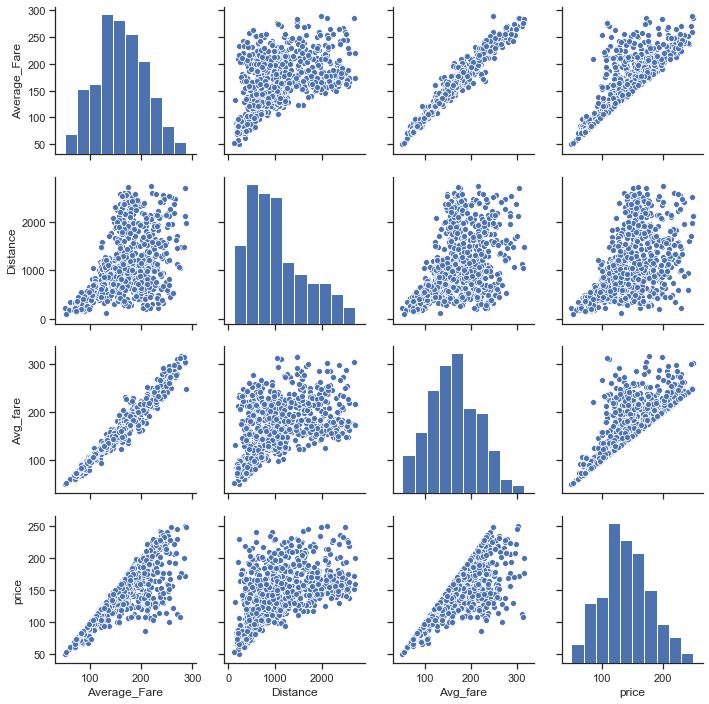

In [30]:
sns.set(style="ticks")
sns.pairplot(us)

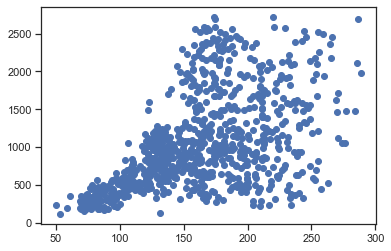

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(us['Average_Fare'], us['Distance'])

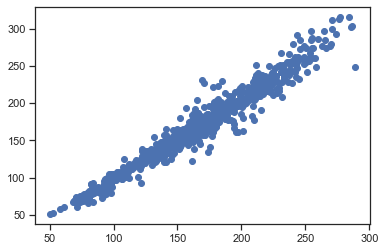

In [32]:
plt.scatter(us['Average_Fare'], us['Avg_fare'])

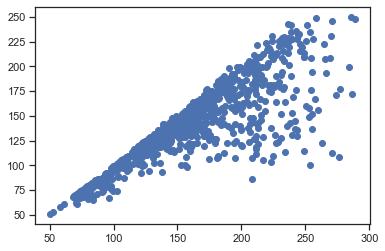

In [33]:
plt.scatter(us['Average_Fare'], us['price'])

<h3>Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)</h3>

In [34]:
X=us.drop(['Average_Fare','City_1','City_2','markt_leading_airline','Lowprice_airline'],axis=1)
Y=us['Average_Fare']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=.20, random_state=1)

In [42]:
X_train.head()

,Distance,Avg_fare,price
131,283,73.59,73.59
323,1069,241.09,151.70
807,1088,152.78,152.78
543,1180,126.18,119.86
624,1866,150.68,142.62


In [45]:
Y_train.head()

131     74.41
323    230.74
807    156.93
543    126.07
624    148.94
Name: Average_Fare, dtype: float64

In [36]:
from sklearn import linear_model

In [37]:
linear_model = linear_model.LinearRegression()
model = linear_model.fit(X_train,Y_train)

In [38]:
pred = linear_model.predict(X_test)

In [39]:
# Predictions
pred

array([160.41528019, 144.3541106 ,  85.96736939, 110.0218442 ,
       112.71948092,  72.86913656, 131.6411907 ,  83.81684497,
       176.29916977, 211.54595436, 177.50232191,  90.9475853 ,
       133.12386773, 166.22278921, 210.5939895 , 192.81862847,
       165.6119807 , 124.4903543 , 146.01040383, 208.82061547,
       120.34254141, 228.58915244, 180.52960926,  99.10130525,
       261.25155107, 254.47434287,  76.85634683, 286.97622182,
       142.62130032, 268.0980894 ,  78.42780158, 169.65965796,
        80.32499536, 119.39603369, 116.3932052 , 140.04467679,
       174.78143795, 229.12251105, 160.11258394, 137.75938558,
       131.13703406, 125.32110852, 171.72182387,  80.54475263,
       131.47287916, 265.21764884, 130.94835847, 166.94587222,
       162.23658344,  90.42564082, 215.89753909, 148.71572034,
       122.7139189 , 212.45642591, 184.62746533, 224.8268451 ,
        78.83300213, 120.14604925, 148.359822  , 208.52803477,
       179.34319874, 166.83934208, 160.60497858, 222.89

<h3>Print the coefficients & intercepts of the linear regression model (5 points)</h3>

In [40]:
 #this gives the coefficients of the 3 features selected above.
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model.coef_ [idx]))

The coefficient for Distance is 0.0017030273458205777
The coefficient for Avg_fare is 0.749701968614342
The coefficient for price is 0.21801893962832292


In [41]:
linear_model.intercept_ # The intercept

5.741402943974379

<h3>Print the accuracy of the overall model (2.5 points)</h3>

In [52]:
linear_model.score(X,Y) # The accuracy

0.9708282329278434